# Loading the dump data and Analyzing 

### Load the dump train data

In [7]:
import pickle
import os
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf 
from skimage.color import rgb2gray
from skimage import transform

In [1]:
 

ROOT_PATH = "fruits-360/"
dump_directory = os.path.join(ROOT_PATH,"DumpData")


ouf = open( os.path.join(dump_directory,"train_data.dump"), 'rb')
train_data = pickle.load(ouf, encoding='bytes')
ouf.close(  )





### Getting data from the dictionary

In [2]:

labels = train_data['lables']
images = train_data['images']
names = train_data['names']    



### Preview of Data set

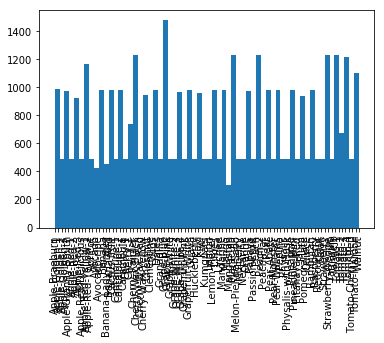

In [6]:
# Import the `pyplot` module



# Make a histogram 
plt.hist(labels, 62)

plt.xticks(names,rotation='vertical')
plt.rcParams['figure.figsize']=(50,10)
# Show the plot
plt.show()

#### sample image from the data set

shape: (100, 100, 3), min: 0, max: 255


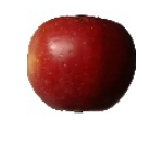

In [22]:
# sample image
value = 20

plt.rcParams['figure.figsize']=(2,2)  
plt.axis('off')
plt.imshow(images[value])
print("shape: {0}, min: {1}, max: {2}".format(images[value].shape, 
                                              images[value].min(), 
                                              images[value].max()))

plt.show()

### Reducing size of the image from 100x100 to 28x28

In [19]:

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28), mode='constant') for image in images]


C:\Users\Namila\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


TypeError: 'tuple' object is not callable

shape: (28, 28, 3), min: 0.0, max: 1.0


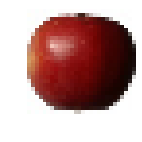

In [24]:
# sample image
value = 20

plt.rcParams['figure.figsize']=(2,2)  
plt.axis('off')
plt.imshow(images28[value])
print("shape: {0}, min: {1}, max: {2}".format(images28[value].shape, 
                                              images28[value].min(), 
                                              images28[value].max()))

plt.show()

In [22]:
# Import `rgb2gray` from `skimage.color`


# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)



In [18]:
images28.shape

(46371, 28, 28)

shape: (28, 28), min: 0.02604028011204488, max: 1.0


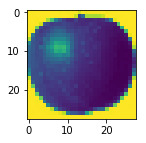

In [9]:
# sample image
value = 20

plt.rcParams['figure.figsize']=(2,2)  
#plt.axis('off')
plt.imshow(images28[value])
print("shape: {0}, min: {1}, max: {2}".format(images28[value].shape, 
                                              images28[value].min(), 
                                              images28[value].max()))

plt.show()

# Using tensorflow Neural Network

### Creating Label to id dictionary

In [10]:

label_to_id = {v : k for k, v in enumerate(names)}
id_to_label = {v : k for k, v in label_to_id.items()}

training_label_id = np.array([label_to_id[i] for i in labels])



array([ 0,  0,  0, ..., 89, 89, 89])

In [16]:
train_label_id = np.array([label_to_id[i] for i in labels])

train_label_id

array([ 0,  0,  0, ..., 89, 89, 89])

### Creating a NN layer

In [70]:
# sess.graph contains the graph definition; that enables the Graph Visualizer.
tf.summary.scalar('loss', loss)
tf.summary.scalar('predicted_labels', correct_pred)
merged = tf.summary.merge_all()
file_writer = tf.summary.FileWriter('logs.log', sess.graph)


In [66]:
# Import `tensorflow` 


# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 90, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### train the NN

In [76]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(200):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y:train_label_id })
        

EPOCH 0
EPOCH 1
EPOCH 2
EPOCH 3
EPOCH 4
EPOCH 5
EPOCH 6
EPOCH 7
EPOCH 8
EPOCH 9
EPOCH 10
EPOCH 11
EPOCH 12
EPOCH 13
EPOCH 14
EPOCH 15
EPOCH 16
EPOCH 17
EPOCH 18
EPOCH 19
EPOCH 20
EPOCH 21
EPOCH 22
EPOCH 23
EPOCH 24
EPOCH 25
EPOCH 26
EPOCH 27
EPOCH 28
EPOCH 29
EPOCH 30
EPOCH 31
EPOCH 32
EPOCH 33
EPOCH 34
EPOCH 35
EPOCH 36
EPOCH 37
EPOCH 38
EPOCH 39
EPOCH 40
EPOCH 41
EPOCH 42
EPOCH 43
EPOCH 44
EPOCH 45
EPOCH 46
EPOCH 47
EPOCH 48
EPOCH 49
EPOCH 50
EPOCH 51
EPOCH 52
EPOCH 53
EPOCH 54
EPOCH 55
EPOCH 56
EPOCH 57
EPOCH 58
EPOCH 59
EPOCH 60
EPOCH 61
EPOCH 62
EPOCH 63
EPOCH 64
EPOCH 65
EPOCH 66
EPOCH 67
EPOCH 68
EPOCH 69
EPOCH 70
EPOCH 71
EPOCH 72
EPOCH 73
EPOCH 74
EPOCH 75
EPOCH 76
EPOCH 77
EPOCH 78
EPOCH 79
EPOCH 80
EPOCH 81
EPOCH 82
EPOCH 83
EPOCH 84
EPOCH 85
EPOCH 86
EPOCH 87
EPOCH 88
EPOCH 89
EPOCH 90
EPOCH 91
EPOCH 92
EPOCH 93
EPOCH 94
EPOCH 95
EPOCH 96
EPOCH 97
EPOCH 98
EPOCH 99
EPOCH 100
EPOCH 101
EPOCH 102
EPOCH 103
EPOCH 104
EPOCH 105
EPOCH 106
EPOCH 107
EPOCH 108
EPOCH 109
EPOCH 110


## Test the model

In [ ]:
#load the file
ouf = open( os.path.join(dump_directory,"test_data.dump"), 'rb')
test_data = pickle.load(ouf, encoding='bytes')
ouf.close(  )

test_labels = test_data['lables']
test_images = test_data['images']
test_names = test_data['names']   

#resize
test_images28 =[transform.resize(image, (28, 28), mode='constant') for image in test_images]

#get the array
test_images28 = np.array(test_images28)

# Convert `images28` to grayscale
test_images28 = rgb2gray(test_images28)

test_label_id = np.array([label_to_id[i] for i in test_labels])

test_label_id

In [77]:
# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_label_id, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.320


In [59]:
len(predicted)

15563

In [46]:
len(test_label_id)

15563

['Granadilla', 'Mandarine', 'Apricot', 'Kumquats', 'Strawberry-Wedge', 'Huckleberry', 'Grape-White-4', 'Pepino', 'Strawberry-Wedge', 'Guava', 'Tangelo', 'Physalis', 'Lemon', 'Lychee', 'Peach', 'Pear-Abate', 'Physalis-with-Husk', 'Kaki', 'Apple-Golden-1', 'Pear-Williams']
[65 53 43 44 61 70 10 66 13 40 53 67 62 70 59 63 68 66  1 65]


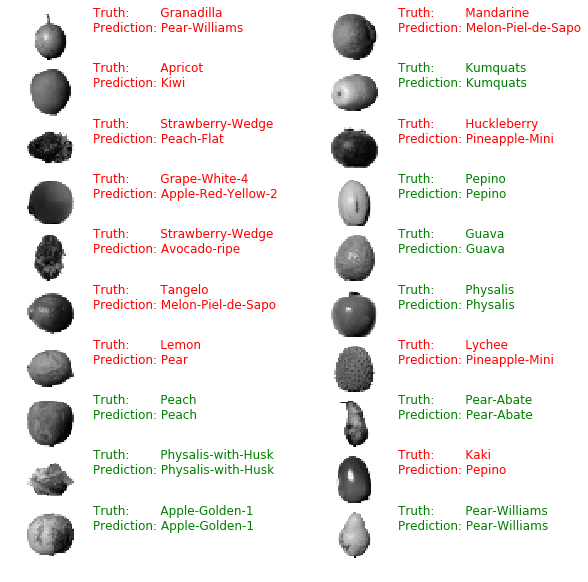

In [81]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(test_images28)), 20)
sample_images = [test_images28[i] for i in sample_indexes]
sample_labels = [test_labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = id_to_label[predicted[i]]
    plt.subplot(10, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()
